# **Linking to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Importing Libraries and Reading The Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
hd = pd.read_csv('/content/clean_heart.csv')

In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0.0,0.292453,0.303887,0,0.5,0.740458,0,0.227273,1.0,0.50,1.0,0
1,0.500000,1,0.0,0.433962,0.272085,1,0.0,0.641221,1,0.704545,0.0,0.00,1.0,0
2,0.854167,1,0.0,0.481132,0.169611,0,0.5,0.412214,1,0.590909,0.0,0.00,1.0,0
3,0.666667,1,0.0,0.509434,0.272085,0,0.5,0.687023,0,0.000000,1.0,0.25,1.0,0
4,0.687500,0,0.0,0.415094,0.593640,1,0.5,0.267176,0,0.431818,0.5,0.75,0.5,0


#**Feature Importance**

**Separate features (X) and target (y)**

In [ ]:
X = hd.drop("target", axis=1)
y = hd["target"]

print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (298, 13)

Shape of y: (298,)


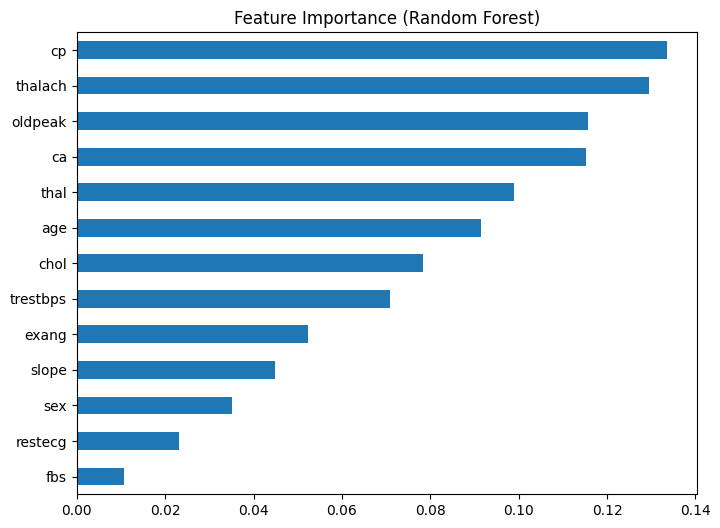

In [ ]:
#train a simple Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# get feature importances
importances=rf.feature_importances_
feat_importances=pd.Series(importances, index=X.columns)

#plot
feat_importances.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.show()

#**Recursive Feature Elimination (RFE)**

In [ ]:
m2 = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=m2, n_features_to_select=8)  # We can change the number of features if we want
rfe.fit_transform(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


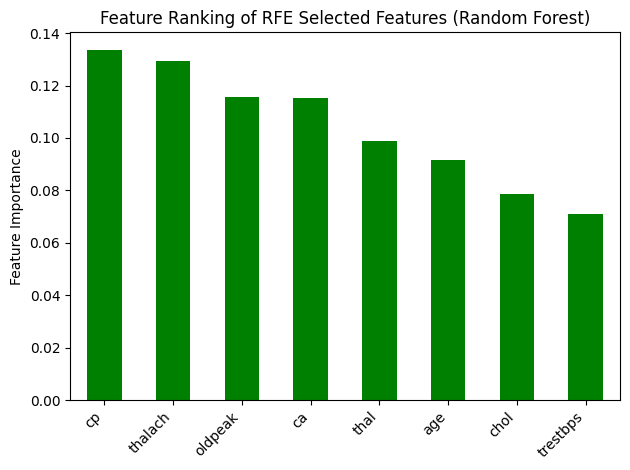

In [ ]:
selected_feat_importances = feat_importances[selected_features]
selected_feat_importances.sort_values(ascending=False).plot(kind="bar", color ='g')
plt.title("Feature Ranking of RFE Selected Features (Random Forest)")
plt.ylabel("Feature Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Chi-Square Test & f_classif**

### Why Chi-Square and `f_classif` Were Not Used ?

In this project, the target variable is binary (0/1), and all input features are numerical. Feature selection was performed using **Recursive Feature Elimination (RFE) with a Random Forest classifier**, which resulted in the selection of the most informative 8 features based on model performance.

**Chi-square feature selection was not used** because it is designed for **categorical or frequency-based features** and requires **non-negative count data**. Since all features in this dataset are continuous numerical variables, applying chi-square would require discretization, which could lead to **loss of information** and does not align with the nature of the data. Moreover, chi-square evaluates features independently and does not capture non-linear relationships or feature interactions.

**The `f_classif` method was also not applied after RFE** because it relies on the ANOVA F-test, which evaluates features independently based on **mean differences between classes** and assumes primarily **linear relationships**. In contrast, Random Forest is capable of modeling **non-linear patterns and complex feature interactions**, and RFE selects features based on their actual contribution to the model’s predictive performance. Therefore, applying `f_classif` after RFE would be redundant and could potentially eliminate features that are important in a non-linear context.

Overall, **RFE combined with Random Forest provides a stronger, model-aware feature selection approach** for this problem, making additional filter-based methods such as chi-square or `f_classif` unnecessary.


# **Saving The Final Dataset**

In [ ]:
hd = hd[selected_features]
hd['target'] = y

/tmp/ipython-input-2546368972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd['target'] = y


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    float64
 1   cp        298 non-null    float64
 2   trestbps  298 non-null    float64
 3   chol      298 non-null    float64
 4   thalach   298 non-null    float64
 5   oldpeak   298 non-null    float64
 6   ca        298 non-null    float64
 7   thal      298 non-null    float64
 8   target    298 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.1 KB


In [ ]:
#hd.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/featureSelection_heart.csv", index=False)